In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import load_logs

pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)

# New optimizer is loaded with previously seen points
load_logs(new_optimizer, logs=["../Data/Simulations/logs.json"])

new_optimizer.space.target

array([ 73.61018772,  82.81792205, 117.85141151, 127.7585105 ,
       129.95153431, 122.48121462, 135.00442889, 139.2024724 ,
       139.10593536, 103.31252866, 140.13928589, 140.76415407,
       135.70712309, 140.68378421, 140.9345352 , 115.79949849,
       139.10056539, 140.75309626, 113.14151144, 140.91696649,
       140.90184677, 140.43048586, 141.1182964 , 140.91220277,
       131.95435419])

In [3]:
def extract_target_logs(fn, logdir = "../Data/Simulations/"):
    pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
    new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)
    # New optimizer is loaded with previously seen points
    load_logs(new_optimizer, logs=[logdir+fn])

    return new_optimizer.space.target
extract_target_logs("logs.json")

array([ 73.61018772,  82.81792205, 117.85141151, 127.7585105 ,
       129.95153431, 122.48121462, 135.00442889, 139.2024724 ,
       139.10593536, 103.31252866, 140.13928589, 140.76415407,
       135.70712309, 140.68378421, 140.9345352 , 115.79949849,
       139.10056539, 140.75309626, 113.14151144, 140.91696649,
       140.90184677, 140.43048586, 141.1182964 , 140.91220277,
       131.95435419])

In [4]:
# import OS module
import os
 
# Get the list of all files and directories
path = "../Data/Simulations/"
dir_list = os.listdir(path)
dir_list

['logs_eipu_03-03-2023_00-27-38_time_13859.28621360218.json',
 'logs_eipu_02-03-2023_23-23-56_time_13458.733626166859.json',
 'logs_ei_02-03-2023_23-27-55_time_13695.360827073484.json',
 'logs_eipu_03-03-2023_00-42-45_time_13825.921596513443.json',
 'logs_eipu_03-03-2023_00-43-38_time_13725.736781462225.json',
 'logs_ei_02-03-2023_23-45-55_time_14647.963941636699.json',
 'logs_ei_02-03-2023_23-38-21_time_14133.533041292623.json',
 'logs_eipu_02-03-2023_23-51-39_time_13380.098111404908.json',
 'logs_eipu_03-03-2023_00-57-22_time_13407.133971097806.json',
 'logs_ei_02-03-2023_23-47-50_time_14012.806307659977.json',
 'logs_ei_02-03-2023_23-28-41_time_14249.204926066286.json',
 'logs_eipu_03-03-2023_00-58-05_time_13462.610663215004.json',
 'logs_eipu_03-03-2023_00-28-36_time_13597.034990994196.json',
 'logs_ei_02-03-2023_23-46-45_time_14216.72993650488.json',
 'logs_ei_02-03-2023_23-30-05_time_13915.31027997903.json',
 'logs_eipu_03-03-2023_00-34-58_time_13535.962868572236.json',
 'logs_ei

In [5]:
def get_best(arr):
    # return an equal length array that records the best value seen so far
    best = np.array([arr[:i+1].max() for i in range(len(arr))])
    return best

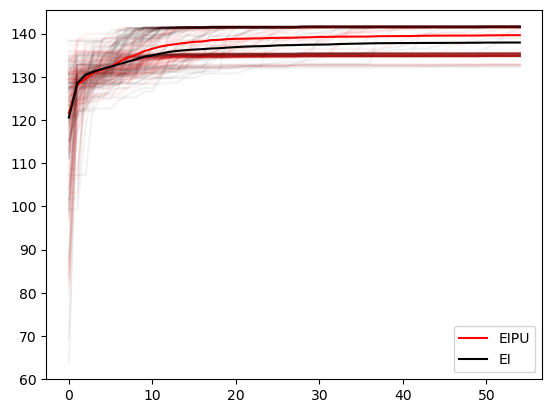

In [6]:
ei_logs = []

eipu_logs = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
        plt.plot(target_log, c='r', alpha=0.05)
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
        plt.plot(target_log, c='black', alpha=0.05)
plt.plot(sum(eipu_logs)/len(eipu_logs), c='r', label='EIPU')
plt.plot(sum(ei_logs)/len(ei_logs), c='black', label='EI')  
plt.legend()  
plt.show()

# plt.plot(extract_target_logs("logs_ei_17-02-2023_01-33-14.json"))
# plt.plot(extract_target_logs("logs_eipu_17-02-2023_01-32-21.json"))


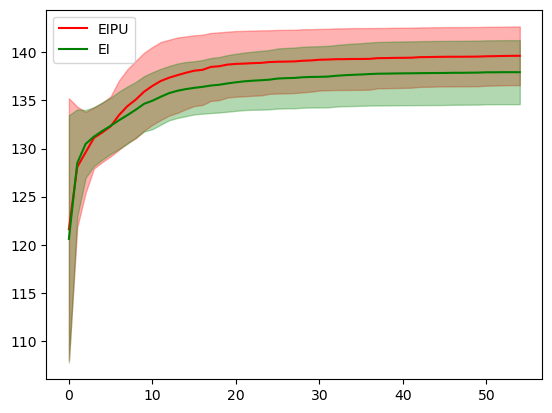

In [7]:
ei_logs = []
eipu_logs = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
        
eipu_mean = sum(eipu_logs)/len(eipu_logs)
ei_mean = sum(ei_logs)/len(ei_logs)
plt.plot(eipu_mean, c='r', label='EIPU')
eipu_ucb = eipu_mean + np.std(eipu_logs, axis=0)
eipu_lcb = eipu_mean - np.std(eipu_logs, axis=0)
plt.fill_between(range(55), eipu_ucb, eipu_lcb, color='r', alpha=0.3)

plt.plot(ei_mean, c='green', label='EI')
ei_ucb = ei_mean + np.std(ei_logs, axis=0)
ei_lcb = ei_mean - np.std(ei_logs, axis=0)
plt.fill_between(range(55), ei_ucb, ei_lcb, color='green', alpha=0.3)
plt.legend()  
plt.show()

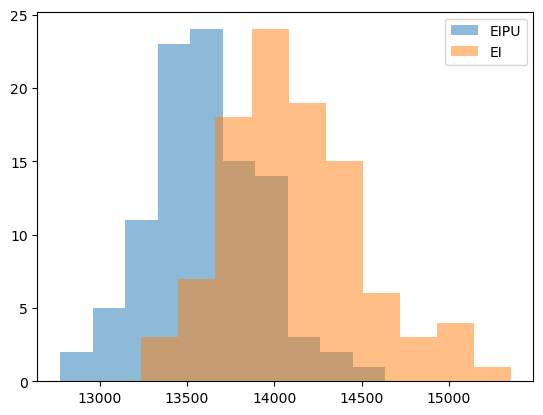

In [8]:
eipu_time = []
ei_time = []
for log in dir_list:
    if 'eipu' in log:
        if 'time' in log:
            eipu_time.append(float(log.split('_')[-1][:-5]))
    elif 'ei' in log:
        if 'time' in log:
            ei_time.append(float(log.split('_')[-1][:-5]))
            
plt.hist(eipu_time, alpha=0.5, label='EIPU')
plt.hist(ei_time, alpha=0.5, label='EI')
plt.legend()
plt.show()